In [1]:
##################### MOUNT YOUT GOOGLE DRIVE AS A FOLDER ######################
#from google.colab import drive
#drive.mount('/content/gdrive',force_remount=True)

In [2]:
import os
import numpy as np
import skimage.io as io
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import *
from keras.optimizers import Adam
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
#os.chdir('/content/gdrive/My Drive/Colab Notebooks/Hindi Handwritten Character Dataset')
#os.listdir()

In [2]:
X_train = pd.read_csv('C:\\Users\\91970\\X_train.csv')
X_train = X_train.drop(X_train.columns[0], axis = 1)
X_train = np.array(X_train)

NameError: name 'pd' is not defined

In [5]:
Y_train = pd.read_csv('C:\\Users\\91970\\Y_train.csv')
Y_train = Y_train.drop(Y_train.columns[0], axis = 1)
Y_train = np.array(Y_train)

In [6]:
X_test = pd.read_csv('C:\\Users\\91970\\X_test.csv')
X_test = X_test.drop(X_test.columns[0], axis = 1)
X_test = np.array(X_test)

In [7]:
Y_test = pd.read_csv('C:\\Users\\91970\\Y_test.csv')
Y_test = Y_test.drop(Y_test.columns[0], axis = 1)
Y_test = np.array(Y_test)

In [8]:
X_train = X_train.reshape((78200,32,32,1))
print(X_train.shape)
Y_train = Y_train.reshape((78200,1))
print(Y_train.shape)
X_test = X_test.reshape((13800,32,32,1))
print(X_test.shape)
Y_test = Y_test.reshape((13800,1))
print(Y_test.shape)

(78200, 32, 32, 1)
(78200, 1)
(13800, 32, 32, 1)
(13800, 1)


In [9]:
ref = np.load('C:\\Users\\91970\\References.npy', allow_pickle=True).item()
print(ref)

{37: 0, 38: 1, 39: 2, 40: 3, 41: 4, 42: 5, 43: 6, 44: 7, 45: 8, 46: 9, 10: 'yna', 11: 'taamatar', 12: 'thaa', 13: 'daa', 14: 'dhaa', 15: 'adna', 16: 'tabala', 17: 'tha', 18: 'da', 19: 'dha', 1: 'ka', 20: 'na', 21: 'pa', 22: 'pha', 23: 'ba', 24: 'bha', 25: 'ma', 26: 'yaw', 27: 'ra', 28: 'la', 29: 'waw', 2: 'kha', 30: 'motosaw', 31: 'petchiryakha', 32: 'patalosaw', 33: 'ha', 34: 'chhya', 35: 'tra', 36: 'gya', 3: 'ga', 4: 'gha', 5: 'kna', 6: 'cha', 7: 'chha', 8: 'ja', 9: 'jha'}


In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 2)
X_test, Y_test = shuffle(X_test, Y_test, random_state = 0)

C:\Users\91970\AppData\Local\Temp\ipykernel_9452\637493652.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(ref[int(Y_test[0])])


taamatar


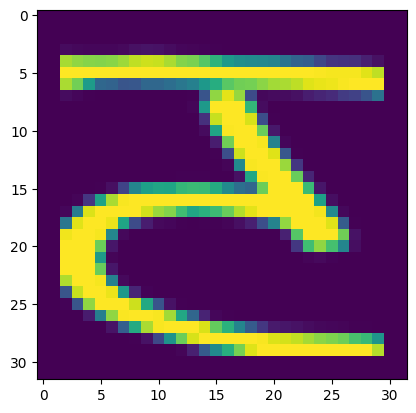

In [12]:
plt.imshow(X_test[0])
print(ref[int(Y_test[0])])

In [13]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size = 0.6, random_state = 1)
print(X_test.shape)
print(X_val.shape)

(5520, 32, 32, 1)
(8280, 32, 32, 1)


In [14]:
Y_test = to_categorical(Y_test)
print(Y_test.shape)

(5520, 47)


In [15]:
Y_val = to_categorical(Y_val)
print(Y_val.shape)

(8280, 47)


In [16]:
Y_train = to_categorical(Y_train)
print(Y_train.shape)

(78200, 47)


In [17]:
inputs = Input(shape = (32,32,1))
conv1 = Conv2D(64, 3, padding='same', activation='relu')(inputs)
conv2 = Conv2D(128, 3, padding='same', activation='relu')(conv1)
pool2 = MaxPooling2D((2,2))(conv2)
conv3 = Conv2D(128, 3, padding='same', activation='relu')(pool2)
conv4 = Conv2D(256, 5, padding='same', activation='relu')(conv3)
pool4 = MaxPooling2D((2,2))(conv4)
conv5 = Conv2D(256, 5, padding='same', activation='relu')(pool4)
flat = Flatten()(conv5)
dense0 = Dense(512, activation='relu')(flat)
dense1 = Dense(128, activation='relu')(dense0)
dense2 = Dense(47, activation='softmax')(dense1)

model = Model(inputs = inputs, outputs = dense2)
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 47)             │         6,063 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,141,039 (42.50 MB)

 Trainable params: 11,141,039 (42.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
model.compile(optimizer=Adam(learning_rate= 10e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 20, batch_size = 400, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 849s 4s/step - accuracy: 0.5608 - loss: 1.6689 - val_accuracy: 0.9628 - val_loss: 0.1204
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 827s 4s/step - accuracy: 0.9753 - loss: 0.0818 - val_accuracy: 0.9795 - val_loss: 0.0692
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 801s 4s/step - accuracy: 0.9885 - loss: 0.0374 - val_accuracy: 0.9791 - val_loss: 0.0683
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 809s 4s/step - accuracy: 0.9928 - loss: 0.0241 - val_accuracy: 0.9830 - val_loss: 0.0694
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 820s 4s/step - accuracy: 0.9939 - loss: 0.0199 - val_accuracy: 0.9825 - val_loss: 0.0607
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 808s 4s/step - accuracy: 0.9965 - loss: 0.0131 - val_accuracy: 0.9867 - val_loss: 0.0493
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 799s 4s/step - accuracy: 0.9960 - loss: 0.0132 - val_accuracy: 0.9839 - val_loss: 0.0650
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 786s 4s/step - accuracy: 0.9965 - loss: 0.0113 - val_accu

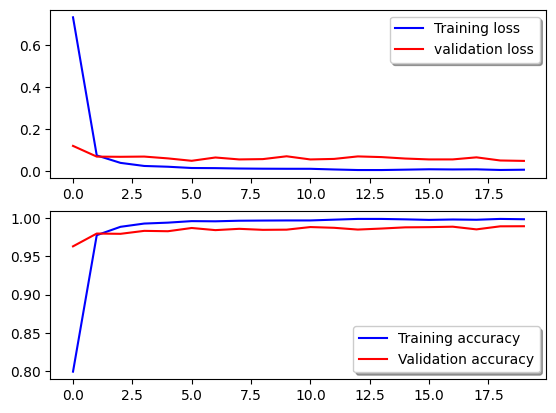

In [19]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [20]:
model.save('First model.h5')

In [21]:
model.evaluate(X_test, Y_test, batch_size = 400, verbose =1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9867 - loss: 0.0649


[0.054502956569194794, 0.988043487071991]

In [22]:
model.metrics_names

['loss', 'compile_metrics']

In [23]:
predicted = model.predict(x = X_test, verbose = 1)

173/173 ━━━━━━━━━━━━━━━━━━━━ 18s 101ms/step


yaw


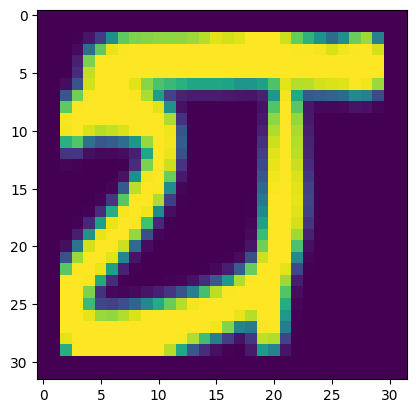

In [24]:
index = 500
img = X_test[index]
img = img.reshape((32,32))
plt.imshow(img)
predicted = np.argmax(predicted, axis = 1)
print(ref[predicted[index]])

In [25]:
inputs = Input(shape = (32,32,1))
conv0 = Conv2D(64, 3, padding = 'same', activation = 'relu')(inputs)
conv1 = Conv2D(64, 3, padding='same', activation='relu')(conv0)
conv2 = Conv2D(128, 3, padding='same', activation='relu')(conv1)
pool2 = MaxPooling2D((2,2))(conv2)
conv3 = Conv2D(128, 3, padding='same', activation='relu')(pool2)
conv4 = Conv2D(256, 5, padding='same', activation='relu')(conv3)
pool4 = MaxPooling2D((2,2))(conv4)
conv5 = Conv2D(256, 5, padding='same', activation='relu')(pool4)
flat = Flatten()(conv5)
dense0 = Dense(512, activation='relu')(flat)
dense1 = Dense(128, activation='relu')(dense0)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(47, activation='softmax')(dense2)

model1 = Model(inputs = inputs, outputs = dense3)
print(model1.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 256)      │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 47)             │         3,055 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,183,215 (42.66 MB)

 Trainable params: 11,183,215 (42.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import *

In [27]:
datagen = ImageDataGenerator(rotation_range = 10, zoom_range = 0.1, width_shift_range = 0.1, height_shift_range = 0.1)
datagen.fit(X_train)

In [28]:
model1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8,
                              patience=3)

In [31]:
history = model1.fit(datagen.flow(X_train, Y_train, batch_size = 200), epochs = 25, steps_per_epoch = 391, validation_data = (X_val, Y_val), callbacks = [reduce_lr])

Epoch 1/25


C:\Users\91970\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 1005s 3s/step - accuracy: 0.4291 - loss: 2.1526 - val_accuracy: 0.9597 - val_loss: 0.1266 - learning_rate: 0.0010
Epoch 2/25


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9597 - val_loss: 0.1266 - learning_rate: 0.0010
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 992s 3s/step - accuracy: 0.9448 - loss: 0.1797 - val_accuracy: 0.9824 - val_loss: 0.0619 - learning_rate: 0.0010
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9824 - val_loss: 0.0619 - learning_rate: 0.0010
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 990s 3s/step - accuracy: 0.9713 - loss: 0.0967 - val_accuracy: 0.9865 - val_loss: 0.0492 - learning_rate: 0.0010
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9865 - val_loss: 0.0492 - learning_rate: 0.0010
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 990s 3s/step - accuracy: 0.9782 - loss: 0.0705 - val_accuracy: 0.9870 - val_loss: 0.0408 - learning_rate: 0.0010
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 

In [32]:
model1.save('Second model.h5')

In [33]:
model1.evaluate(X_test, Y_test, batch_size = 400, verbose =1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 977ms/step - accuracy: 0.9933 - loss: 0.0277


[0.028592195361852646, 0.9934782385826111]

In [34]:
model1.metrics_names

['loss', 'compile_metrics']

In [35]:
# For model
predicted_model=model.predict(X_test)
predicted_labels_model=np.argmax(predicted_model,axis=1)
print(predicted_labels_model)

#ground truth labels
true_labels=np.argmax(Y_test, axis=1)
print(true_labels)

# confusion matrix
conf_matrix_model=confusion_matrix(true_labels,predicted_labels_model)

#F1 score
f1_model=f1_score(true_labels,predicted_labels_model,average='weighted')

#precision
precision_model=precision_score(true_labels,predicted_labels_model,average='weighted')

#recall
recall_model=recall_score(true_labels,predicted_labels_model,average='weighted')

print("For Model:")
print("confusion Matrix:",conf_matrix_model)
print("F1 Score:", f1_model)
print("Precision:", precision_model)
print("Recall:", recall_model)

173/173 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step
[ 9 40 43 ...  1 44 35]
[ 9 40 43 ...  1 44 35]
For Model:
confusion Matrix: [[104   0   0 ...   0   0   0]
 [  0 119   0 ...   0   0   0]
 [  0   0 127 ...   0   0   0]
 ...
 [  0   0   0 ... 138   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 121]]
F1 Score: 0.9880411815619476
Precision: 0.9881398543968094
Recall: 0.9880434782608696
